In [2]:
%reload_ext autoreload
%autoreload 2

from alphadia.extraction.workflow import logger

In [2]:
workflow_logger = logger.MetricLogger(
    backends=[
        logger.StdoutBackend(),
        logger.FigureBackend(path = '/Users/georgwallmann/Documents/data/performance_tests/outputs/astral_lf_dia')
    ]
)

In [3]:
with workflow_logger.context:
    workflow_logger.log_metric("accuracy", 0.9)
    workflow_logger.log_metric("loss", 0.1)

accuracy: 0.9
loss: 0.1


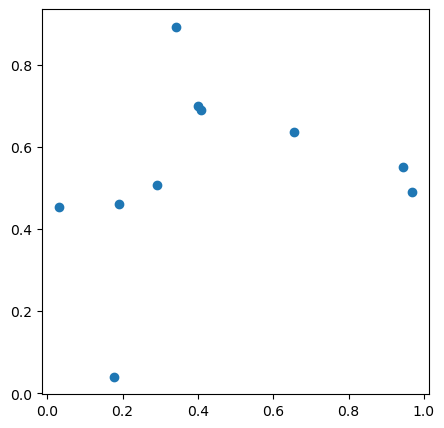

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from io import BytesIO
import base64

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.random.rand(10), np.random.rand(10))



In [11]:
path = '/Users/georgwallmann/Documents/data/performance_tests/outputs/astral_lf_dia/.progress'

workflow_logger = logger.MetricLogger(
    backends=[
        #logger.StdoutBackend(),
        logger.FigureBackend(path = path),
        logger.JSONLBackend(path = path, enable_figure=False)
    ]
)

In [12]:
with workflow_logger.context:
    workflow_logger.log_event("start_extraction", None)
    workflow_logger.log_figure("scatter", fig)

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import tempfile
import os

def test_backend():

    backend = logger.Backend()
    backend.log_event("start_extraction", None)
    backend.log_metric("accuracy", 0.9)
    backend.log_string("test")
    backend.log_figure("scatter", None)
    backend.log_data("test", None)

test_backend()

def test_figure_backend():

    figure_backend = logger.FigureBackend(path = tempfile.gettempdir())

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(np.random.rand(10), np.random.rand(10))

    figure_backend.log_figure("scatter", fig)
    plt.close(fig)

    assert os.path.exists(os.path.join(tempfile.gettempdir(), figure_backend.FIGURE_PATH, "scatter.png"))
    os.remove(os.path.join(tempfile.gettempdir(), figure_backend.FIGURE_PATH, "scatter.png"))

test_figure_backend()

def test_jsonl_backend():
    
    with logger.JSONLBackend(path = tempfile.gettempdir()) as jsonl_backend:
        jsonl_backend.log_event("start_extraction", None)
        jsonl_backend.log_metric("accuracy", 0.9)
        jsonl_backend.log_string("test")

    assert os.path.exists(os.path.join(tempfile.gettempdir(), "events.jsonl"))
    with open(os.path.join(tempfile.gettempdir(), "events.jsonl"), "r") as f:
        assert len(f.readlines()) == 5
    os.remove(os.path.join(tempfile.gettempdir(), "events.jsonl"))

test_jsonl_backend()